In [3]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Decision Trees are another popular class of ML algorithms. We will use the dataset about forged banknotes https://www.openml.org/d/1462

In [4]:
banknotes = sklearn.datasets.fetch_openml(name='banknote-authentication')
data = banknotes['data']
labels = banknotes['target']
var_names = banknotes['feature_names']
target_names = banknotes['target_names']

df = pd.DataFrame(data, columns=var_names)
df['label'] = labels

data_X = df.drop('label', axis=1)
data_y = df['label']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_X, data_y, test_size=0.2, random_state=5)

## Train a Decision Tree Classifier with max_depth=2 and visualize the resulting tree.

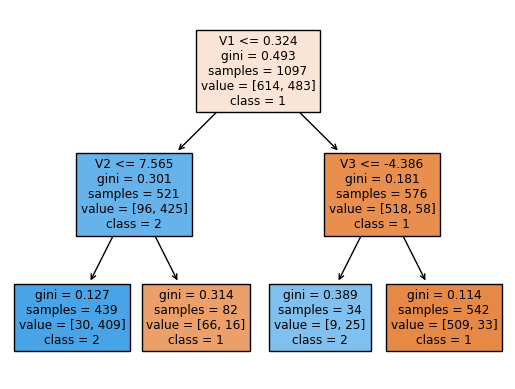

In [5]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=5)

model = dtc.fit(X_train,y_train)

sklearn.tree.plot_tree(model,
                   feature_names=var_names,
                   class_names=['1', '2'],
                   filled=True)
plt.show()

## Use a grid search to find the best parameter settings for the classifier. Search in depth values between 2 and 15, test both criteria (entropy and gini) for measuring the split quality, and test both criteria to select the split (best and random).

In [6]:
param_grid = {'max_depth': [2, 4, 6, 8, 10, 12, 15],
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random']}

grid_search_cv = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(random_state=5), param_grid,
                                                      verbose=1)

grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)

grid_predictions = grid_search_cv.predict(X_test)

print('Accuracy after grid for Decision Tree Classifier', sklearn.metrics.accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=5,
                       splitter='random')
Accuracy after grid for Decision Tree Classifier 0.9927272727272727


## Decision Trees can also be used for regression problems. For the sake of simplicity, we simply use the original numeric target values of the dataset as numeric regression targets. Apply some gaussian noise (mean of 0 and standard deviation of 0.2) to make the target values more realistic.

In [7]:
noise = np.random.normal(0, 0.2, [1372,])

df_reg = df.copy()
df_reg['label'] = df_reg['label'].astype(np.int8) + noise


## Repeat the steps

In [8]:
data_X = df_reg.drop('label', axis=1)
data_y = df_reg['label']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_X, data_y, test_size=0.2,
                                                                            random_state=5)

param_grid = {'max_depth': [2, 4, 6, 8, 10, 12, 15],
              'splitter': ['best', 'random'],
              'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}

grid_search_cv = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeRegressor(random_state=5), param_grid,
                                                      verbose=1)

grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)

grid_predictions = grid_search_cv.predict(X_test)

print('r2_score after grid for Decision Tree Regressor', sklearn.metrics.r2_score(y_test, grid_predictions))

Fitting 5 folds for each of 56 candidates, totalling 280 fits
{'criterion': 'friedman_mse', 'max_depth': 6, 'splitter': 'best'}
DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, random_state=5)
r2_score after grid for Decision Tree Regressor 0.778970152063624
